 The Dimensions of the image is (40, 512, 512)
 The Min value in the image is -1024.0
 The Max value the image is 1201.0


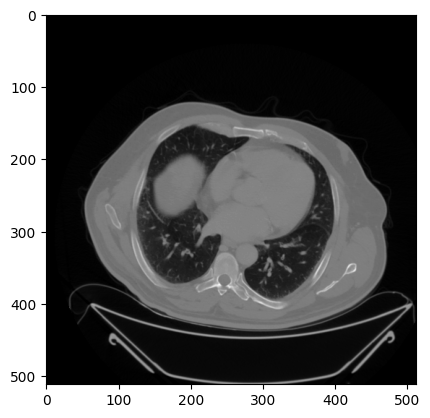

In [8]:
#!pip install pydicom
import pydicom
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import re
import pandas as pd
import random
import matplotlib.animation as animation
from IPython.display import HTML

# Read Dicom files using dcmread function
def read_Dicom_file(x): 
    # Read files (sort dcm files before read them)
    dicoms = [pydicom.dcmread(os.path.join(x, file)) for file in sorted(os.listdir(x)) if file.endswith(".dcm")] 
    M = float(dicoms[0].RescaleSlope)
    B = float(dicoms[0].RescaleIntercept)
    # Assume all images are axial
    z_pos = [float(d.ImagePositionPatient[-1]) for d in dicoms]
    dicoms = np.asarray([d.pixel_array for d in dicoms])
    dicoms = dicoms[np.argsort(z_pos)]
    # Adjust the pixel values from raw pixel data to Hounsfield Units
    dicoms = dicoms * M
    dicoms = dicoms + B
    return dicoms

# Replace by your path
Image_path="C:/Users/user/Desktop/CT-Volume"
Image=read_Dicom_file(Image_path)
print(f" The Dimensions of the image is {Image.shape}")
print(f" The Min value in the image is {Image.min()}")
print(f" The Max value the image is {Image.max()}")
plt.imshow(Image[39,:,:], cmap='gray')

In [13]:

def load_dicom_series(dicom_folder):
    dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(dicom_folder) if f.endswith('.dcm')]
    
    # Read all slices
    dicom_slices = [pydicom.dcmread(f) for f in dicom_files]

    # Sort the slices
    dicom_slices.sort(key=lambda x: getattr(x, "InstanceNumber", 0)) 
    # Convert pixel data to a np array
    volume = np.array([s.pixel_array for s in dicom_slices], dtype=np.float32)
    # Normalize pixel intensities
    volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))
    return volume

def create_animation(dicom_folder, case):
    """Create an animation displaying all slices of a DICOM volume."""
    volume = load_dicom_series(dicom_folder)
    fig, ax = plt.subplots(figsize=(6, 6))
    images = []
    
    for idx in range(volume.shape[0]): 
        img_plot = ax.imshow(volume[idx], cmap='gray', animated=True)
        images.append([img_plot])

    ax.axis('off')
    ax.set_title(f'Patient ID: {case} ({volume.shape[0]} slices)', fontsize=10)

    # Create animation
    ani = animation.ArtistAnimation(fig, images, interval=100, blit=False, repeat_delay=500)
    plt.close(fig)
    return HTML(ani.to_jshtml())

# Replace with your DICOM folder path
dicom_folder = "C:/Users/user/Desktop/CT-Volume" 
case = "Case20"  
create_animation(dicom_folder, case)